# Goal

Here we load in the ENSO/QBO data and visualize these climate variability indices. We plot:

1. ENSO Timeseries over 1979-2017.5
2. Singapore Winds Timeseries over 1979-2017.5
3. QBO EOFs following Wallace et al. (2003)
4. QBO EOF Projections "Wheel"
5. QBO EOF Projected Timeseries'

In [42]:
% add our path for functions
addpath('/Users/dgilford/ncar_summer_2017/gr_radiosondes/fx_library');

## Load Data

In [16]:
enso_path='/Users/dgilford/ncar_summer_2017/gr_radiosondes/variability_indices/mei_data_0617.mat';
load(enso_path)
qbo_eof_path='/Users/dgilford/ncar_summer_2017/gr_radiosondes/variability_indices/qboeof_data_0617.mat';
load(qbo_eof_path)
qbo_eof=qbo;
qbo_path='/Users/dgilford/ncar_summer_2017/gr_radiosondes/variability_indices/qbo_data_0617.mat';
load(qbo_path)
whos

  Name               Size            Bytes  Class     Attributes

  ans               68x1               544  double              
  enso_path          1x85              170  char                
  mei                1x1              9088  struct              
  qbo                1x1             50504  struct              
  qbo_eof            1x1             63800  struct              
  qbo_eof_path       1x88              176  char                
  qbo_path           1x85              170  char                



## 1.  ENSO Timeseries

ENSO data is drawn from the MEI (NOAA ESRL, https://www.esrl.noaa.gov/psd/enso/mei/table.html).

In [17]:
% convert mei index to a timeseries 
for yr=1:length(mei.year)
    for m=1:12
        tind=(yr-1)*12+m;
        mei_ts(tind)=mei.index(yr,m);
    end
end

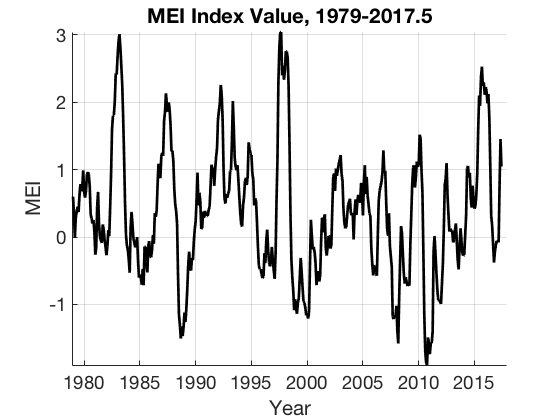

In [22]:
% plot the result between 1979 and 2017.5
h1=figure(1);
set(gcf,'color','w')
set(gca,'FontSize',14)
hold on
    plot(mei.time,mei_ts,'k','LineWidth',2)
    title('MEI Index Value, 1979-2017.5')
    axis('tight')
    xlim([1979 2018-1/12])
    xlabel('Year')
    ylabel('MEI')
    grid
hold off

## 2. Singapore Winds, 1979-2017

Singapore winds drawn from FU-Berlin QBO dataset (http://www.geo.fu-berlin.de/en/met/ag/strat/produkte/qbo/).

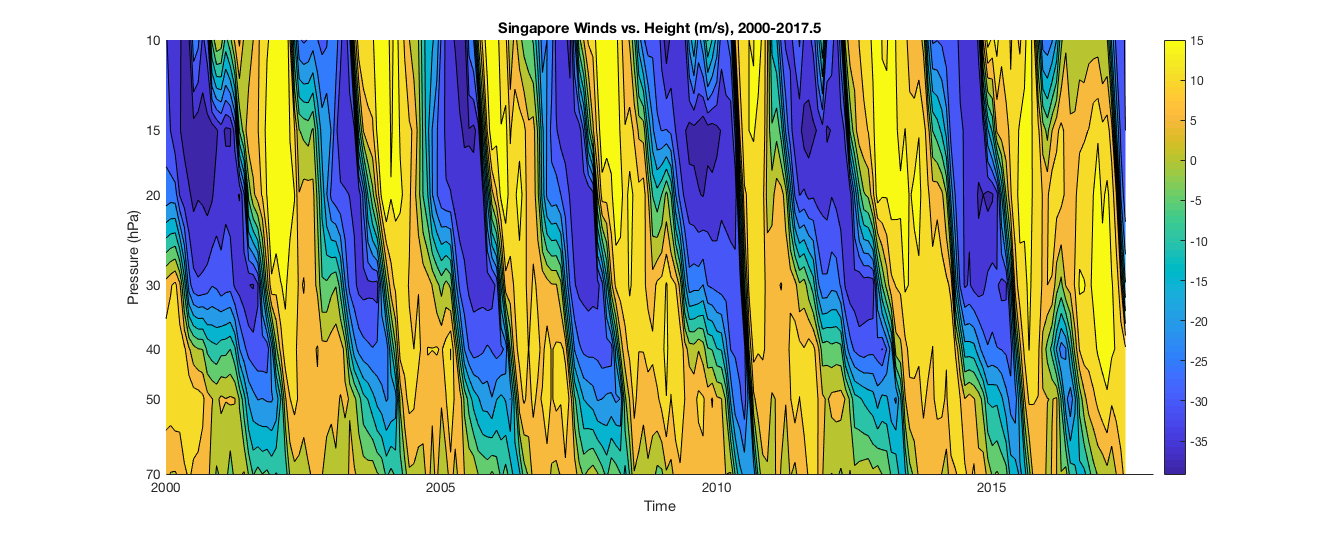

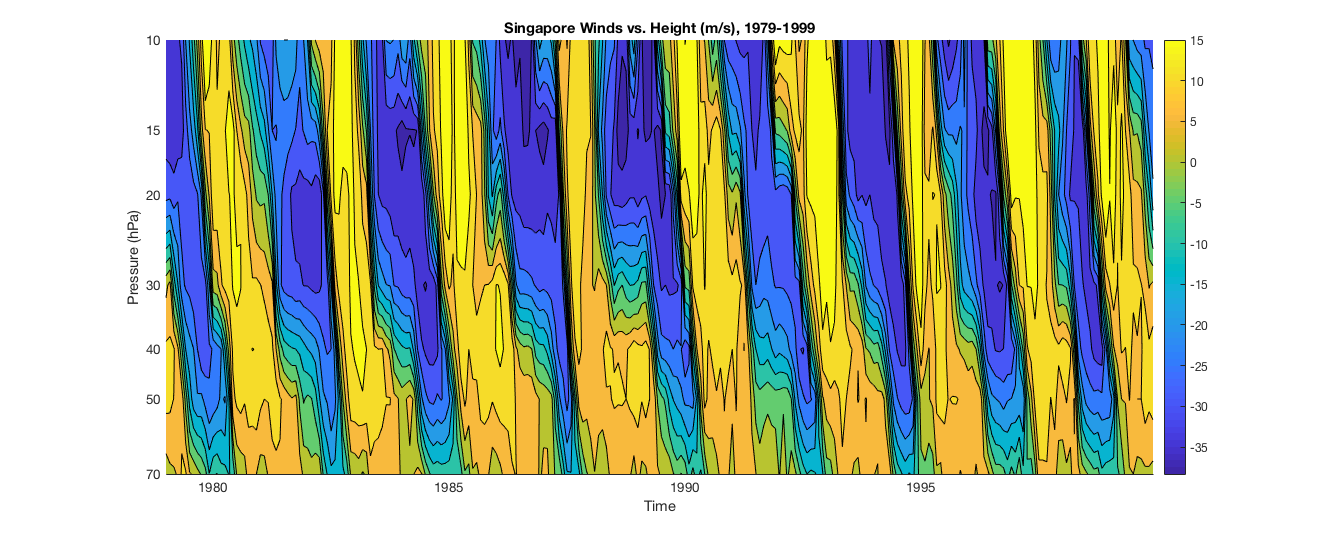

In [33]:
% contour the QBO with respect to height since 1979
firstinds=find(qbo.time>=1979 & qbo.time<2000);
secondinds=find(qbo.time>=2000);
clevels=-40:5:15;

% plot 1979-1999
h2=figure(2);
hold on
    contourf(qbo.time(firstinds),qbo.lvlgrid,qbo.index(firstinds,:)',clevels)
    set(gca,'YTick',fliplr(qbo.lvlgrid),'YTickLabel',fliplr(qbo.lvlgrid))
    set(gca,'XTick',1980:5:2000)
    set(gca,'ydir','reverse','yscale','log')
    xlabel('Time')
    ylabel('Pressure (hPa)')
    title('Singapore Winds vs. Height (m/s), 1979-1999')
    colorbar
hold off
set(h2, 'Position', [200 200 1000 400])
set(h2,'PaperPositionMode','auto')

% plot 2000-2017.5
h3=figure(3);
hold on
    contourf(qbo.time(secondinds),qbo.lvlgrid,qbo.index(secondinds,:)',clevels)
    set(gca,'YTick',fliplr(qbo.lvlgrid),'YTickLabel',fliplr(qbo.lvlgrid))
    set(gca,'XTick',2000:5:2015)
    set(gca,'ydir','reverse','yscale','log')
    xlabel('Time')
    ylabel('Pressure (hPa)')
    title('Singapore Winds vs. Height (m/s), 2000-2017.5')
    colorbar
hold off
set(h3, 'Position', [200 200 1000 400])
set(h3,'PaperPositionMode','auto')

## 3.  QBO EOFs following Wallace et al. (2003)

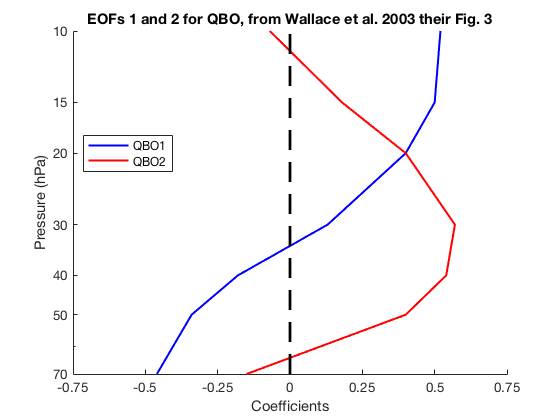

In [38]:
% plot the first and second eofs
close all
h4=figure(4);
hold on
    plot(qbo_eof.eof1_weights,qbo_eof.lvlgrid,'b','LineWidth',1.5)
    plot(qbo_eof.eof2_weights,qbo_eof.lvlgrid,'r','LineWidth',1.5)
    plot([0 0],[qbo_eof.lvlgrid(1) qbo_eof.lvlgrid(end)],'k--','LineWidth',2)
    legend('QBO1','QBO2','Location','Best')
    set(gca,'YTick',fliplr(qbo_eof.lvlgrid),'YTickLabel',fliplr(qbo_eof.lvlgrid))
    set(gca,'XTick',-0.75:0.25:0.75)
    set(gca,'ydir','reverse','yscale','log')
    xlim([-0.75 0.75])
    title('EOFs 1 and 2 for QBO, from Wallace et al. 2003 their Fig. 3')
    xlabel('Coefficients')
    ylabel('Pressure (hPa)')
hold off

In [45]:
% smooth the EOF timeseries
nmon_move=5;
qbo1_smooth=movmean(qbo_eof.eof1,[nmon_move 0]);
qbo2_smooth=movmean(qbo_eof.eof2,[nmon_move 0]);

% reduce the data to between 1979 and present
goodinds=find(qbo.time>=1979);
qbo1_red=qbo1_smooth(goodinds);
qbo2_red=qbo2_smooth(goodinds);

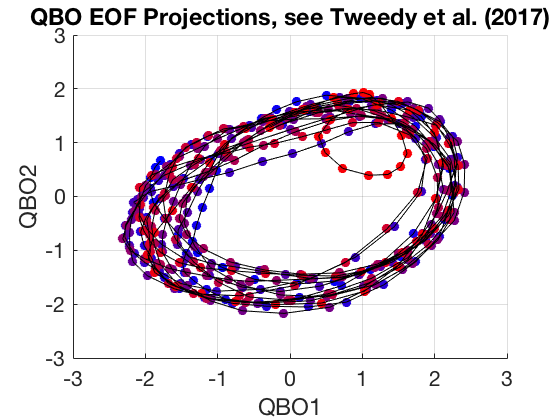

In [46]:
% plot the phase space
h5=figure(5);
set(gcf,'color','w')
set(gca,'FontSize',16)
hold on
dat1=qbo1_red(~isnan(qbo1_red));
dat2=qbo2_red(~isnan(qbo2_red));
[color_grid,~]=colorGradient([0 0 1],[1 0 0],length(dat1));
    for k=1:length(dat1)
        plot(dat1(k),dat2(k),'o','color',color_grid(k,:),'MarkerFaceColor',color_grid(k,:))
    end
    plot(dat1,dat2,'k')
    grid
    title('QBO EOF Projections, see Tweedy et al. (2017)')
    xlim([-3 3])
    ylim([-3 3])
    xlabel('QBO1')
    ylabel('QBO2')
hold off

## 5. Projected QBO Timeseries (EOF1 and EOF2)

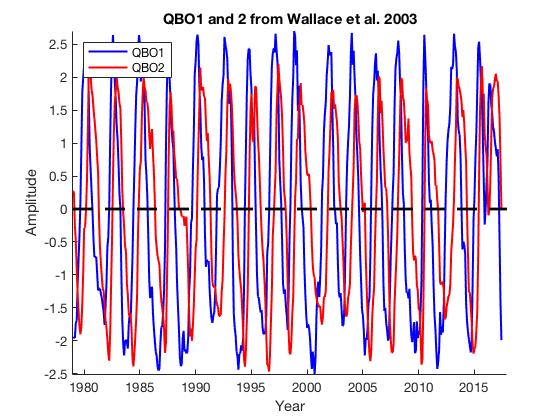

In [54]:
% plot the timeseries
h6=figure(6);
hold on
    plot(qbo.time(goodinds),qbo_eof.eof1(goodinds),'b','LineWidth',1.5)
    plot(qbo.time(goodinds),qbo_eof.eof2(goodinds),'r','LineWidth',1.5)
    plot([qbo.time(goodinds(1)) qbo.time(end)],[0 0],'k--','LineWidth',2)
    legend('QBO1','QBO2','Location','Northwest')
    title('QBO1 and 2 from Wallace et al. 2003')
    axis('tight')
    xlabel('Year')
    ylabel('Amplitude')
    axis('tight')
hold off